# Encoder and Decoder
---
## What is an Encoder and Decoder?

**Encoder and Decoder** are key components in many neural network architectures, particularly in sequence-to-sequence (seq2seq) models. These models are widely used in tasks like machine translation, text summarization, and speech recognition. Let's break down these concepts:

---

## 1. **Encoder**

**The Encoder** is the first part of the model. Its job is to take an input sequence and convert it into a fixed-size internal representation, often referred to as a context or thought vector. This representation captures the important information from the input sequence in a condensed form.

### **How the Encoder Works:**

- **Input Sequence**: The input is a sequence of data points, like words in a sentence or frames in a video.
  
- **Processing**: Each element in the sequence is passed through a series of layers in the Encoder. In the case of an RNN-based Encoder (like LSTM or GRU), each word is processed one by one, with the hidden state being updated at each step. The final hidden state (or a combination of all hidden states) becomes the "context vector."
  
- **Output**: The Encoder produces the context vector, which summarizes the entire input sequence into a fixed-length representation.

### **Simple Example of an Encoder:**

Imagine translating the English sentence **"I am learning"** into French.

- The Encoder reads the sentence word by word ("I", "am", "learning").
- After processing all words, it creates a context vector that encodes the meaning of the entire sentence.

---

## 2. **Decoder**

**The Decoder** is the second part of the model. It takes the context vector generated by the Encoder and generates an output sequence, which is the desired translated or transformed sequence.

### **How the Decoder Works:**

- **Input**: The Decoder starts with the context vector from the Encoder and sometimes an initial start token (like <start>).
  
- **Processing**: It generates the output sequence one element at a time. Each element generated becomes part of the input for generating the next element. The Decoder might also use its previous outputs and the context vector to predict the next word.
  
- **Output**: The Decoder produces the final output sequence, like a translated sentence or a summarized paragraph.

#### **Simple Example of a Decoder:**

Continuing the translation example, let's say the context vector from the Encoder represents the sentence **"I am learning."**

- The Decoder uses this vector to generate the French translation, word by word, producing **"Je"**, **"suis"**, **"en train d'apprendre"** in sequence.

---

### **Putting it Together: Encoder-Decoder Model**

In tasks like machine translation, the Encoder-Decoder model works as follows:

1. **Encoder**: Takes the input sequence (e.g., an English sentence) and converts it into a context vector.
2. **Context Vector**: Acts as a bridge between the input and output sequences, capturing the essence of the input.
3. **Decoder**: Takes the context vector and generates the output sequence (e.g., the translated sentence in French).

### **Why Use Encoder-Decoder?**

- **Flexibility**: The Encoder-Decoder framework allows handling sequences of varying lengths. The input and output sequences can be of different lengths, making it suitable for tasks like translation where sentences may not have a one-to-one correspondence in terms of word count.
  
- **Contextual Understanding**: By summarizing the entire input sequence into a context vector, the Decoder can make informed decisions while generating the output, leading to more accurate predictions.

### **Example in Practice:**

Imagine you want to translate **"How are you?"** into Spanish.

- **Encoder**: Reads "How are you?" and produces a context vector summarizing this question.
- **Decoder**: Uses this context vector to generate the Spanish equivalent, "¿Cómo estás?"

Each word in the output is generated step by step, with the Decoder considering both the context vector and the previously generated words.

# Inside the Encoder and Decoder

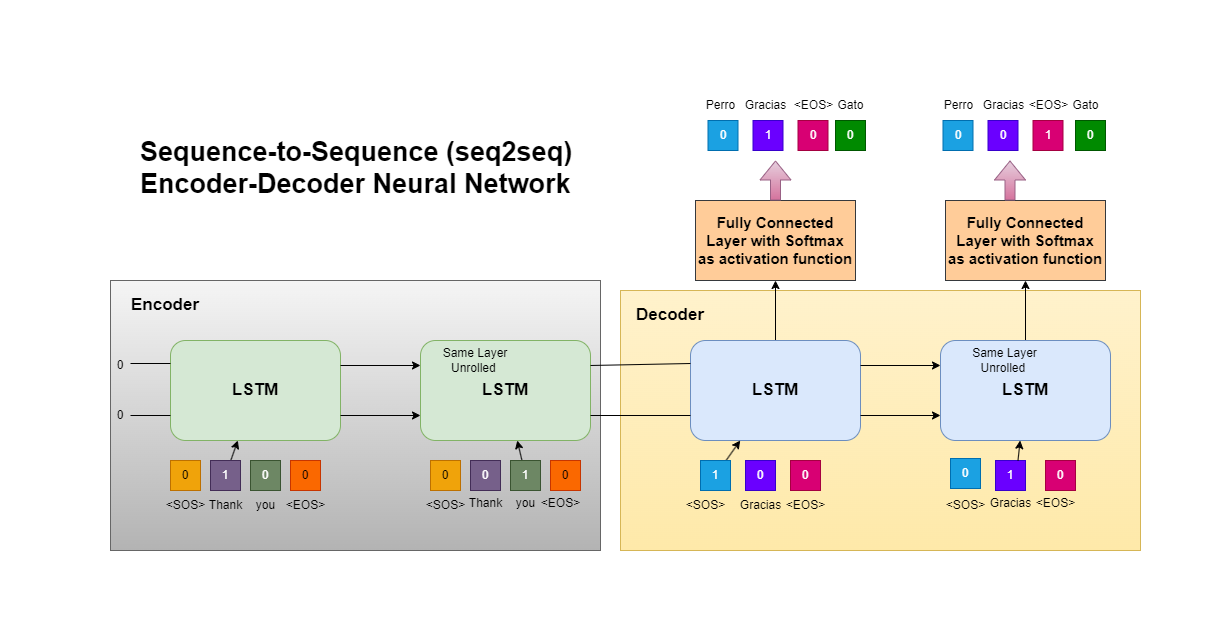

*[Image Source](https://www.linkedin.com/pulse/decoding-sequence-to-sequence-seq2seq-encoder-decoder-babu-thomas/)*

---

## What is Inside the Encoder and Decoder?

To understand how the Encoder and Decoder work, let's dive into the components that make up each of these parts. We'll then walk through a simple translation example from English to Spanish to see how they function together.

### **Inside the Encoder**

The Encoder is made up of layers of neural network units, typically Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) networks, or Gated Recurrent Units (GRUs). Here's a breakdown:

1. **Embedding Layer** (optional but common):
   - Converts each word in the input sequence into a dense vector (word embedding) that represents the word in a high-dimensional space.
   - Example: "How" → [0.1, 0.3, 0.7, ...] (a vector representation).

2. **Recurrent Layers (RNN/LSTM/GRU)**:
   - These layers process the input sequence word by word. Each word updates the hidden state, which carries information about the sequence so far.
   - Each word is influenced by the previous word in the sequence.
   - Example: After processing "How," the hidden state holds information about "How." When "are" is processed, the hidden state now holds information about "How are."

3. **Final Hidden State (Context Vector)**:
   - After processing the entire input sequence, the final hidden state (or a combination of all hidden states) is used as the **context vector**. This vector summarizes the meaning of the entire input sequence.
   - Example: After processing "How are you?", the context vector represents the overall meaning of this sentence.

---

### **Inside the Decoder**

The Decoder also consists of layers of neural network units, and it works in conjunction with the Encoder's context vector:

1. **Initial State**:
   - The Decoder starts with the context vector from the Encoder, which gives it the "memory" of the input sequence.

2. **Recurrent Layers (RNN/LSTM/GRU)**:
   - Similar to the Encoder, the Decoder has recurrent layers. It generates the output sequence word by word.
   - It takes the context vector and a start token (like `<start>`) as input to generate the first word.
   - Each subsequent word is generated using the previously generated word and the current hidden state.

3. **Output Layer**:
   - This layer converts the Decoder's hidden state into a probability distribution over the vocabulary. The word with the highest probability is selected as the output at each step.
   - Example: The Decoder might output "¿Cómo" first, then "estás" based on the context and previous word.

---

## **Step-by-Step Example: English to Spanish Translation**

Let's translate the sentence **"Thanks"** to Spanish **"Gracias"** using an Encoder-Decoder model.

### **Step 1: Input Sequence through the Encoder**

- **Input**: "Thanks"
- **Embedding Layer**: The word "Thanks" is converted into a vector: `[0.2, 0.4, 0.6, ...]`.
- **Recurrent Layers**:
  - The vector `[0.2, 0.4, 0.6, ...]` is processed by the LSTM/GRU cells.
  - The hidden state is updated to capture the meaning of "Thanks."
- **Final Hidden State**: The context vector is created, which summarizes "Thanks."

### **Step 2: Context Vector from Encoder to Decoder**

- The context vector (e.g., `[0.8, 0.1, 0.4, ...]`) is passed to the Decoder.
- This vector is a compressed representation of the input sentence "Thanks."

#### **Step 3: Generating the Output Sequence with the Decoder**

- **Initial Input to Decoder**: The context vector and a start token `<start>` are fed into the Decoder.
- **Recurrent Layers**:
  - The Decoder predicts the first word based on the context vector and `<start>` token. It might predict "Gracias."
  - The word "Gracias" is then used as input for predicting the next word. Since "Gracias" is the full translation, the model will likely predict the end token `<end>` next.
- **Output Layer**: The output is generated step by step:
  - First word: "Gracias" (based on the context vector).
  - End token: `<end>` (indicating the translation is complete).

### **Step 4: Final Output**

- The final translated sentence is "Gracias."
- The model stops generating output after producing the end token.

---

### **Summary**

- **Encoder**: Converts the input sequence into a context vector, which summarizes the entire input sequence.
- **Decoder**: Uses the context vector to generate the output sequence one word at a time.

In our example:
- The **Encoder** processed "Thanks" and created a context vector that captured its meaning.
- The **Decoder** took this context vector and generated the Spanish word "Gracias" as the translation. 

# Limitations and Challenges of Encoder and Decoder
---
The Encoder-Decoder architecture is a powerful and flexible framework, especially for sequence-to-sequence tasks like machine translation, text summarization, and more. However, it has some limitations and challenges:

### 1. **Bottleneck Problem**
   - **Problem**: The context vector, which is a fixed-size representation of the entire input sequence, is supposed to capture all relevant information from the input. However, this single vector often struggles to represent long sequences effectively, leading to information loss.
   - **Example**: When translating a long sentence or paragraph, the context vector might not capture all the details, causing the translation to miss important nuances or information.

### 2. **Difficulty in Handling Long Sequences**
   - **Problem**: As the length of the input sequence increases, the performance of the Encoder-Decoder model typically degrades. This happens because the fixed-length context vector has to encode more and more information, making it harder for the Decoder to retrieve all necessary details.
   - **Example**: In translating a long sentence, the beginning and end of the sentence might be well-represented, but the middle part may get "squeezed" out of the context vector, leading to errors in translation.

### 3. **Lack of Attention Mechanism**
   - **Problem**: The basic Encoder-Decoder architecture does not explicitly allow the Decoder to focus on specific parts of the input sequence during each step of output generation. This means the Decoder is relying on a compressed summary (the context vector) rather than selectively attending to different parts of the input.
   - **Solution**: The Attention mechanism was introduced to address this issue, allowing the Decoder to dynamically focus on different parts of the input sequence as it generates each output word. This has significantly improved the performance of Encoder-Decoder models, especially for tasks like translation.

### 4. **Alignment Problem**
   - **Problem**: There’s often no direct correspondence between words in the input sequence and the output sequence. In translation, for example, the word order might be different in the target language, making it hard for the model to align the input with the output correctly.
   - **Solution**: The Attention mechanism helps mitigate this by learning to align input and output sequences dynamically.

### 5. **Training Challenges**
   - **Problem**: Training the Encoder-Decoder model, especially for long sequences, can be difficult. The model may suffer from vanishing or exploding gradients, particularly in the RNN layers, which makes training slow and unstable.
   - **Example**: If the input sequence is long, the gradients might vanish as they are backpropagated through many layers, leading to poor learning and suboptimal performance.

### 6. **Inference Speed**
   - **Problem**: During inference (i.e., generating output from the model), the Decoder generates the output sequence one word at a time, which can be slow, especially for long sequences.
   - **Example**: In real-time applications like speech translation, the one-step-at-a-time generation of words can introduce delays, making the system less responsive.

### 7. **Overfitting and Generalization**
   - **Problem**: The Encoder-Decoder model can overfit to the training data, especially if the training data is not sufficiently diverse. This can result in poor generalization to new or unseen data.
   - **Example**: If a translation model is trained mostly on formal text, it might struggle with colloquial or informal text.

### **Summary**

While the Encoder-Decoder architecture is foundational and has been highly successful, it has inherent challenges, particularly in handling long sequences, maintaining detailed context, and efficiently training and inferring results. Advances like the Attention mechanism and Transformer models have been developed to address these issues, offering better performance and scalability.

[NEURAL MACHINE TRANSLATION
BY JOINTLY LEARNING TO ALIGN AND TRANSLATE RESEARCH PAPER](https://arxiv.org/pdf/1409.0473)

[Introduction to Attention Mechanism](https://erdem.pl/2021/05/introduction-to-attention-mechanism)

# Attention Mechanism

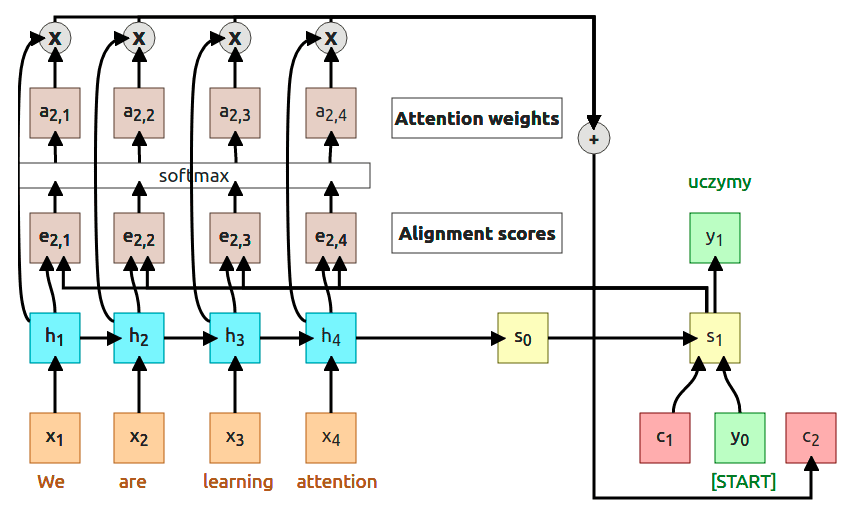


*[Image Source](https://erdem.pl/2021/05/introduction-to-attention-mechanism)*

---

## What is the Attention Mechanism?

The Attention mechanism is a concept used in deep learning models, particularly in sequence-to-sequence tasks like machine translation, text summarization, and more. The idea behind the Attention mechanism is to allow the model to focus on specific parts of the input sequence when generating each word in the output sequence. Instead of relying on a single context vector that summarizes the entire input sequence, the Attention mechanism dynamically assigns different weights to different parts of the input, enabling the model to "attend" to the most relevant information at each step.

### How Does the Attention Mechanism Work?

The Attention mechanism can be understood through the following steps:

1. **Alignment Scores (Attention Scores) Calculation**:
   - For each word in the output sequence, the Attention mechanism calculates an alignment score between the current Decoder state and each Encoder state (which corresponds to each word in the input sequence).
   - This score indicates how much focus or "attention" the Decoder should pay to each word in the input sequence.

2. **Softmax Normalization**:
   - The alignment scores are passed through a softmax function to convert them into a probability distribution. This gives a set of attention weights that sum to 1.
   - These weights determine how much each input word contributes to the current output word.

3. **Context Vector Calculation**:
   - The attention weights are used to create a weighted sum of the Encoder states (hidden states). This weighted sum becomes the new context vector for generating the current output word.
   - The context vector now dynamically changes for each word in the output sequence, focusing on the relevant parts of the input sequence.

4. **Generating the Output Word**:
   - The Decoder uses this dynamically created context vector along with its current state to generate the next word in the output sequence.

## **Example: English to Spanish Translation**

Let's translate the sentence **"Thank you"** to Spanish **"Gracias"** using an Attention mechanism:

1. **Input Sequence through the Encoder**:
   - Encoder processes "Thank" and "you" and produces hidden states for each word.
   - Hidden states: `h1` (for "Thank") and `h2` (for "you").

2. **Attention during Decoding**:
   - **First Word ("Gracias")**:
     - The Decoder starts with the initial hidden state and calculates alignment scores with `h1` and `h2`.
     - Suppose the scores are 0.7 for `h1` and 0.3 for `h2`. After applying softmax, these scores become attention weights.
     - The context vector is calculated as a weighted sum: `0.7 * h1 + 0.3 * h2`.
     - The Decoder generates "Gracias" using this context vector.
   - **Second Word (end of sequence)**:
     - The Decoder recalculates attention scores for the next word, which might focus more on `h2` this time.
     - The context vector might now be `0.4 * h1 + 0.6 * h2`.
     - The Decoder generates the next word or end token using this new context vector.

## Difference Between Attention Mechanism and Basic Encoder-Decoder

| **Feature**                     | **Basic Encoder-Decoder**                                                                                                 | **Attention Mechanism**                                                                                                     |
|---------------------------------|-----------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| **Context Representation**       | Single fixed-size context vector representing the entire input sequence.                                                    | Dynamic context vectors created for each output word, focusing on relevant parts of the input sequence.                     |
| **Handling Long Sequences**      | Struggles with long sequences as all information must be compressed into one vector.                                        | Handles long sequences better by attending to different parts of the input sequence as needed.                              |
| **Alignment of Input and Output**| No explicit alignment between input and output sequences.                                                                  | Explicitly calculates alignment scores, allowing the model to align input and output sequences more effectively.            |
| **Performance**                  | May lose important information in long or complex sentences.                                                               | More robust and accurate, especially for long or complex sequences.                                                         |
| **Scalability**                  | Limited by the capacity of the context vector, leading to poor performance on long sequences.                               | Scales better with longer sequences, as it can selectively focus on relevant parts of the input.                            |

## What Encoder-Decoder Problem is Solved by the Attention Mechanism?

The Attention mechanism addresses several key issues with the basic Encoder-Decoder architecture:

1. **Bottleneck Problem**:
   - **Solution**: Instead of relying on a single fixed-size context vector, the Attention mechanism allows the Decoder to create a dynamic context vector for each output word. This reduces the pressure on the Encoder to compress all information into one vector.

2. **Difficulty in Handling Long Sequences**:
   - **Solution**: The Attention mechanism enables the model to handle long sequences more effectively by focusing on different parts of the input sequence as needed. This avoids the problem of information loss in the context vector.

3. **Alignment Problem**:
   - **Solution**: The Attention mechanism provides a way to explicitly align the input and output sequences, making it easier to capture the correct correspondence between words in translation tasks.

4. **Improved Translation and Sequence Generation**:
   - **Solution**: By focusing on relevant parts of the input sequence at each step, the Attention mechanism improves the quality of translations and other sequence generation tasks, leading to more accurate and contextually appropriate outputs.
 
[Reference](https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html#attention_intro)